In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder



In [2]:
df = pd.read_csv("Salary_Data.csv")
print("First 5 rows:\n", df.head())
print("\nAvailable Columns:", df.columns.tolist())

First 5 rows:
     Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  

Available Columns: ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']


In [3]:
df.columns = df.columns.str.strip()

print("\nMissing values before handling:\n", df.isnull().sum())

df['Age'] = df['Age'].fillna(df['Age'].median())  
df['Years of Experience'] = df['Years of Experience'].fillna(df['Years of Experience'].median())
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

for col in ['Gender', 'Education Level', 'Job Title']:
    df[col] = df[col].fillna(df[col].mode()[0])


Missing values before handling:
 Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [4]:
label_encoders = {}
for col in ['Gender', 'Education Level', 'Job Title']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\nMissing values after handling:\n", df.isnull().sum())


Missing values after handling:
 Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [5]:
X = df[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
y = df['Salary']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\n===== Model Evaluation =====")
print("R² Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)



===== Model Evaluation =====
R² Score: 0.6657400432963108
Mean Squared Error: 892703639.718373
Root Mean Squared Error: 29878.14652414659
Mean Absolute Error: 23740.20993793163


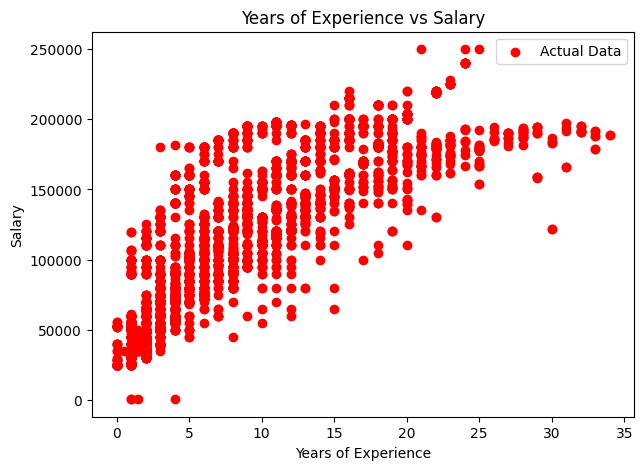

In [10]:
plt.figure(figsize=(7,5))
plt.scatter(df['Years of Experience'], df['Salary'], c='red', label="Actual Data")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Years of Experience vs Salary")
plt.legend()
plt.show()

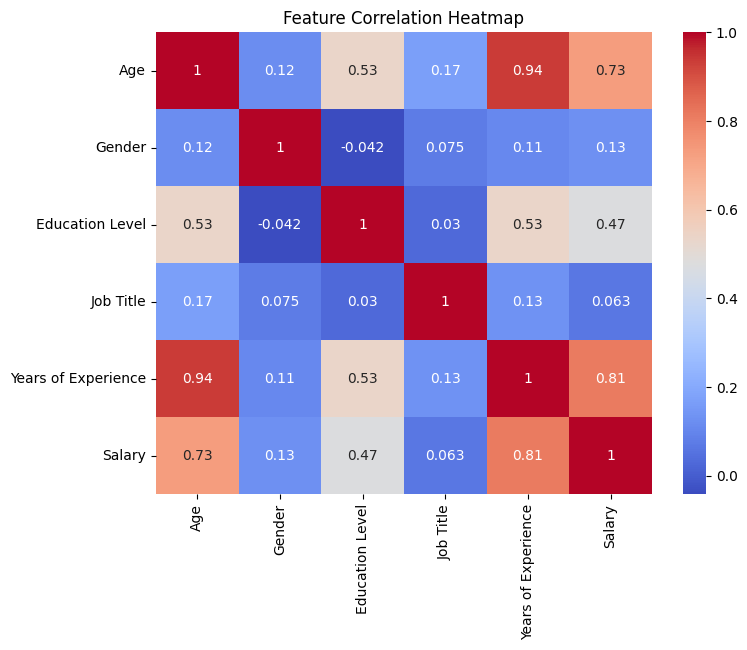

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()